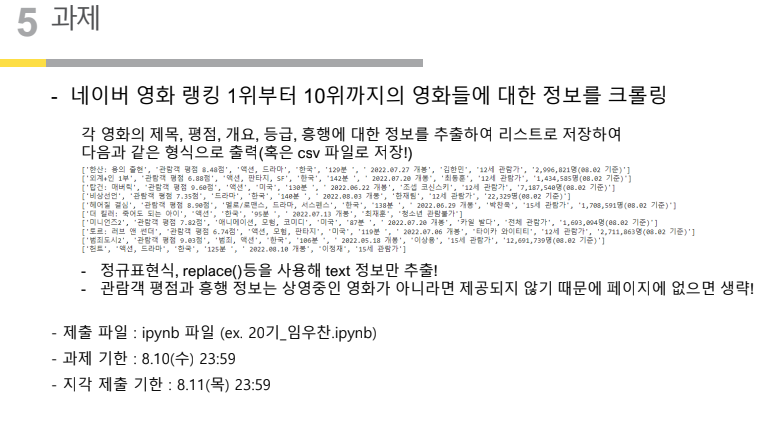

In [1]:
!pip3 install requests
!pip3 install bs4
!pip3 install selenium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 4.5 MB/s 
     |████████████████████████████████| 139 kB 7.1 MB/s 
     |████████████████████████████████| 358 kB 65.5 MB/s 
     |████████████████████████████████| 4.1 MB 46.5 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires ur

In [2]:
import requests
import re

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


##상세 페이지에서 각 요소들 뽑아오기

In [3]:
from bs4 import BeautifulSoup

In [4]:
#관람객수 뽑아오기 (9)

url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=184519'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

soup.find_all('span', class_ = "count")[0].text

'1,635,332명(08.10 기준)'

In [5]:
#관람객 평점 뽑아오기 (2) 
url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=184519'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

soup.find_all('span', class_ = "st_on")[0].text

'관람객 평점 6.64점'

In [6]:
#제목 뽑아오기 (1)
url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=184519'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

raw = soup.find_all('h3', class_ = "h_movie")[0].text

re_raw = re.sub('\|n|상영중|EMERGENCY| |DECLARATION|r|t|2022', '', raw)

print(re_raw)


비상선언


					
					,
					



In [7]:
#감독 뽑아오기 (7)
url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=184519'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

raw = soup.find_all('dd')[0].text

re_raw = re.sub('w|m| ', '', raw)

print(re_raw)


한재림



In [13]:
#장르 뽑아오기 (3)
url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=184519'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

movie_infos = soup.find('dl', class_ = 'info_spec').find('dd').find_all('span')

for movie_info in movie_infos:
  temp = movie_info.get_text()
  temp = re.sub(r'\s+', '', temp)
  list.append(temp)

##각 영화 페이지의 링크를 가져오기


In [16]:
title_links = []
url_ranking = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

res_ranking = requests.get(url_ranking)

soup = BeautifulSoup(res_ranking.text, 'lxml')

title_link = soup.find('tbody')

for i in range(len(title_link.find_all('a', limit = 10))):
  front_url = 'http://movie.naver.com'
  title_links.append(front_url + '' + title_link.find_all('a')[i]['href'])

title_links

['http://movie.naver.com/movie/bi/mi/basic.naver?code=184519',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=194196',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=195758',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=192151',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=198413',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=81888',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=203101',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=219628',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=191634',
 'http://movie.naver.com/movie/bi/mi/basic.naver?code=214552']

##함수 만들기

In [18]:
def crawler(url):
  res = requests.get(url)
  soup = BeautifulSoup(res.text, 'html.parser')
 
  #제목
  raw1 = soup.find_all('h3', class_ = "h_movie")[0].text
  a = re.sub(r'\s+', '', raw1)

  #관람객 평점
  b = soup.find_all('span', class_ = "st_on")[0].text

  #감독
  raw2 = soup.find_all('dd')[0].text
  c = re.sub(r'\s+', '', raw2)

  #관람객 수
  try:
    d = soup.find_all('span', class_ = "count")[0].text
  except:
    d = ''

  list = [a,b,c,d]
  
  #나머지
  movie_infos = soup.find('dl', class_ = 'info_spec').find('dd').find_all('span')

  for movie_info in movie_infos:
    temp = movie_info.get_text()
    temp = re.sub(r'\s+', '', temp)
    list.append(temp)
  
  print(list)

##최종적으로 리스트 만들기

In [ ]:
for i in range(len(title_links)):
  crawler(title_links[i])

['비상선언상영중EMERGENCYDECLARATION,2022', '관람객 평점 6.64점', '한재림', '1,635,332명(08.10 기준)', '드라마', '한국', '140분', '2022.08.03개봉']
['한산:용의출현상영중Hansan:RisingDragon,2021', '관람객 평점 8.54점', '김한민', '5,024,119명(08.10 기준)', '액션,드라마', '한국', '129분', '2022.07.27개봉']
['헌트상영중HUNT,2022', '관람객 평점 8.51점', '이정재', '227,700명(08.10 기준)', '액션,드라마', '한국', '125분', '2022.08.10개봉']
['외계+인1부상영중Alienoid,2022', '관람객 평점 6.89점', '최동훈', '1,508,565명(08.10 기준)', '액션,판타지,SF', '한국', '142분', '2022.07.20개봉']
['헤어질결심상영중DecisionToLeave,2021', '관람객 평점 8.93점', '박찬욱', '1,794,247명(08.10 기준)', '멜로/로맨스,드라마,서스펜스', '한국', '138분', '2022.06.29개봉']
